In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [12]:
train_dir = "/content/drive/MyDrive/dataset/train"
validation_dir = "/content/drive/MyDrive/dataset/val"
image_size = (224, 224)
batch_size = 32

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                               rotation_range = 40,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               shear_range = 0.2,
                               zoom_range = 0.3,
                               horizontal_flip = True)

In [14]:
val_datagen = ImageDataGenerator(rescale = 1./255.)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 4097 images belonging to 2 classes.


In [16]:
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 404 images belonging to 2 classes.


In [17]:
model = Sequential()

model.add(Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))

# Additional convolutional layer with 'relu' activation
#model.add(Conv2D(256, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 16)      1168      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 16)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                 

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics= ['accuracy'])

In [20]:
history = model.fit(train_generator,
                    batch_size = 32,
                    epochs = 20,
                    validation_data=validation_generator
                    )

Epoch 1/20
129/129 [==============================] - 447s 3s/step - loss: 0.6859 - accuracy: 0.5499 - val_loss: 0.6802 - val_accuracy: 0.5644
Epoch 2/20
129/129 [==============================] - 349s 3s/step - loss: 0.6622 - accuracy: 0.6048 - val_loss: 0.6214 - val_accuracy: 0.6931
Epoch 3/20
129/129 [==============================] - 348s 3s/step - loss: 0.6465 - accuracy: 0.6305 - val_loss: 0.5831 - val_accuracy: 0.7698
Epoch 4/20
129/129 [==============================] - 352s 3s/step - loss: 0.6286 - accuracy: 0.6502 - val_loss: 0.6104 - val_accuracy: 0.7005
Epoch 5/20
129/129 [==============================] - 349s 3s/step - loss: 0.6328 - accuracy: 0.6344 - val_loss: 0.5464 - val_accuracy: 0.7426
Epoch 6/20
129/129 [==============================] - 351s 3s/step - loss: 0.5779 - accuracy: 0.7012 - val_loss: 0.4487 - val_accuracy: 0.7995
Epoch 7/20
129/129 [==============================] - 344s 3s/step - loss: 0.5697 - accuracy: 0.7061 - val_loss: 0.3901 - val_accuracy: 0.8564

In [25]:
model.save("Bone_fracture_project_1.h5")

In [93]:
model = tf.keras.models.load_model('Bone_fracture_project_1.h5')

In [120]:
from skimage import io, transform
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the pre-trained model
model = tf.keras.models.load_model('/content/Bone_fracture_project_1.h5')

url = '/content/drive/MyDrive/dataset/test/fractured/9-rotated1-rotated3 - Copy.jpg'
def read_and_transform_img(url):

    img = io.imread(url)
    img = transform.resize(img, (224,224))

    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    return img

images = read_and_transform_img(url)

preds = model.predict(images)
prediction = np.argmax(preds)
pct = np.max(preds)

# Interpret the results
if predictions[0] > 0.5:
    print("Non Fracture")  # Replace with your class label or interpretation
else:
    print("Fracture")

print(pct)

1/1 [==============================] - 0s 106ms/step
Fracture
0.8189099


In [121]:
from tensorflow.keras.applications import inception_v3 as inc_net
from lime import lime_image

In [122]:
explainer = lime_image.LimeImageExplainer()

In [123]:
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,
                                         top_labels=3, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 151ms/step


(-0.5, 223.5, 223.5, -0.5)

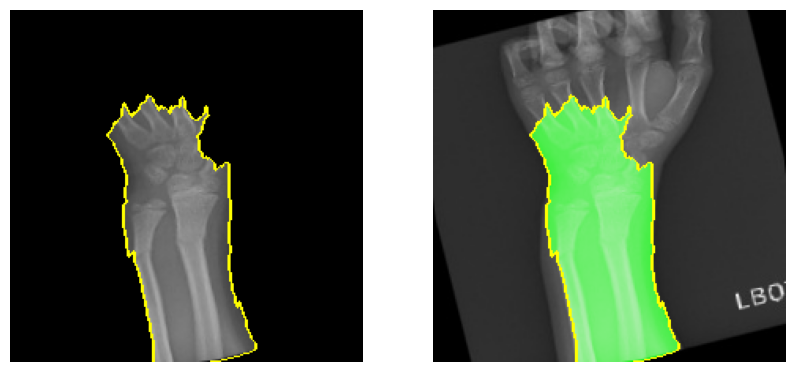

In [124]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

#plt.savefig('1.jpg')